In [1]:
'''
Download the trending YT videos and categories for Germany (beginning 11.08.2020)
from https://www.kaggle.com/rsrishav/youtube-trending-video-dataset
This may take up to 20 seconds
'''
!kaggle datasets download rsrishav/youtube-trending-video-dataset -f DE_category_id.json -p ../dat -q
!kaggle datasets download rsrishav/youtube-trending-video-dataset -f DE_youtube_trending_data.csv -p ../dat -q

In [31]:
# Imports
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
'''
Build the trends df
'''
# Build trends df
trends = pd.read_csv('../dat/DE_youtube_trending_data.csv.zip')

# Build category dict
with open('../dat/DE_category_id.json','r') as f:
    cat_json = json.loads(f.read())
categories = pd.json_normalize(cat_json, record_path =['items'])[["id", "snippet.title"]]
categories.rename(columns={"id": "cat_id", "snippet.title": "cat_title"}, inplace=True)
cat_dict = dict(zip(pd.to_numeric(categories.cat_id), categories.cat_title))

#! ID 29 seems to be missing -> add manually from https://gist.github.com/dgp/1b24bf2961521bd75d6c
cat_dict[29] = 'Nonprofits & Activism'

# Replace cat_id with cat_title in the trends df
trends.replace({"categoryId": cat_dict},inplace=True)
trends.rename(columns={"categoryId": "category"}, inplace=True)

# Convert tagslist to array
trends['tags'] = trends['tags'].apply(lambda x: x.split('|'))

In [3]:
trends.head(1)

,video_id,title,publishedAt,channelId,channelTitle,category,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,KJi2qg5F-9E,Bonez MC - HOLLYWOOD (Snippet),2020-08-11T18:00:03Z,UCGh8tmH9x9njaI2mXfh2fyg,CrhymeTV,Music,2020-08-12T00:00:00Z,"[187, 187 Strassenbande, BONEZ MC, RAF Camora,...",573902,69319,970,3311,https://i.ytimg.com/vi/KJi2qg5F-9E/default.jpg,False,False,Hollywood Fanbox vorbestellen ► http://bonezmc...


<AxesSubplot:>

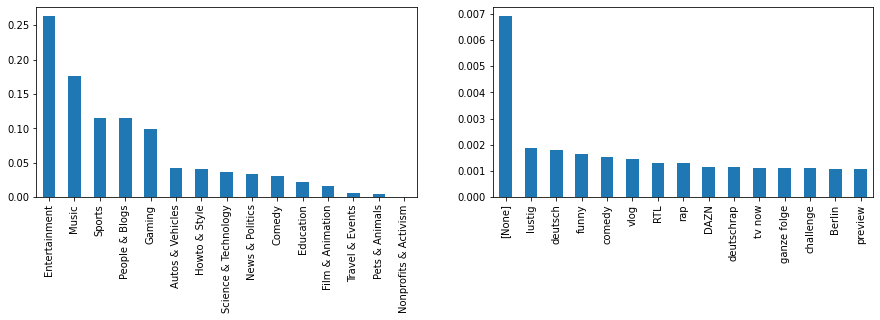

In [40]:
'''
Plot category and tag popularity for the full dataset
'''
plt.subplots(1, 2, figsize=(15, 3.5), sharey=False)

# Plot category popularity
plt.subplot(1, 2, 1)
pop_cat = trends.category.value_counts(normalize=True)
pop_cat.plot(kind='bar')

# Plot the 15 most popular tags
plt.subplot(1, 2, 2)
tags = pd.Series(np.concatenate(trends.tags))
pop_tags = tags.value_counts(normalize=True)
pop_tags[0:15].plot(kind='bar')